# Working with Time Series Data

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

`pip install vega_datasets`

Use it like this:

```python
from vega_datasets import data
```

## Exercises

In [60]:
import matplotlib.pyplot as plt
from vega_datasets import data
import pandas as pd

### sf_temps dataset

In [27]:
sf = data.sf_temps()

In [28]:
sf

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


#### 1.
Resample by the day and take the average temperature. Visualize the average temperature over time.

<Axes: xlabel='date', ylabel='Avg Temp (F)'>

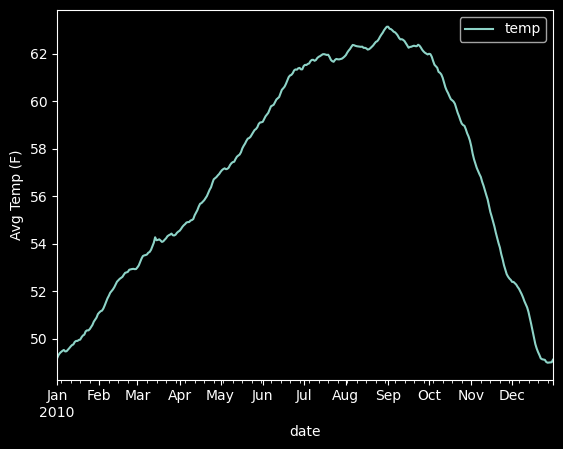

In [30]:
# Resample date to be by avg temp by day
sf.resample('D', on='date').mean().plot(ylabel='Avg Temp (F)')

#### 2. 
Write the code necessary to visualize the minimum temperature over time.


<Axes: xlabel='date', ylabel='Min Temp (F)'>

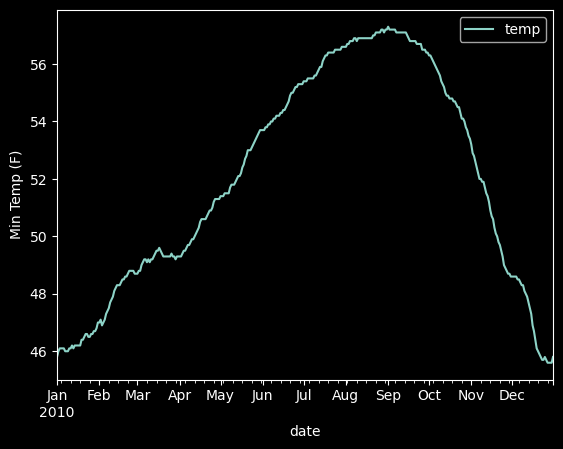

In [32]:
# Visualize min over time
sf.resample('D', on='date').min().plot(ylabel='Min Temp (F)')

#### 3. 
Write the code necessary to visualize the maximum temperature over time.


<Axes: xlabel='date', ylabel='Max Temp (F)'>

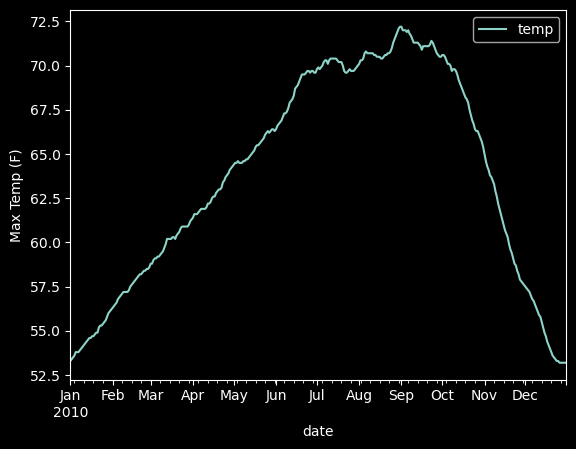

In [33]:
# Visualize max temp over time
sf.resample('D', on='date').max().plot(ylabel='Max Temp (F)')

#### 4. 
Which month is the coldest, on average?


In [61]:
sf.resample('D', on='date').min().sort_values('temp')

# December

,temp
date,
2010-12-29,45.6
2010-12-28,45.6
2010-12-27,45.6
2010-12-30,45.6
2010-12-26,45.7
...,...
2010-09-04,57.2
2010-09-03,57.2
2010-08-30,57.2


#### 5. 
Which month has the highest average temperature?

In [44]:
sf.resample('D', on='date').mean().sort_values('temp', ascending=False)

# September

,temp
date,
2010-09-01,63.129167
2010-08-31,63.129167
2010-08-30,63.058333
2010-09-02,63.045833
2010-09-03,63.029167
...,...
2010-12-26,49.025000
2010-12-29,49.012500
2010-12-30,49.012500


#### 6. 
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.

In [47]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

sf_minmax = sf.resample('D', on='date').agg(['min', 'max']).temp

sf_minmax['temp_change'] = sf_minmax['max'] - sf_minmax['min']

sf_minmax.sort_values('temp_change', ascending=False)

# AUGUST 31 2010

,min,max,temp_change
date,,,
2010-08-31,57.2,72.2,15.0
2010-09-01,57.3,72.2,14.9
2010-08-30,57.2,72.1,14.9
2010-08-29,57.1,71.9,14.8
2010-09-02,57.2,72.0,14.8
...,...,...,...
2010-12-25,45.8,53.3,7.5
2010-01-04,46.1,53.6,7.5
2010-12-31,45.8,53.2,7.4


#### Month?

In [57]:
# Resample by the month and calculate the min and max temp for the month (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the month.

sf_monthly = sf.resample('M', on='date').agg(['min', 'max']).temp

In [79]:
sf_monthly['temp_change'] = sf_monthly['max'] - sf_monthly['min']

sf_monthly.sort_values('temp_change', ascending=False)

# OCTOBER

,min,max,temp_change
date,,,
2010-10-31,53.4,70.6,17.2
2010-11-30,48.6,65.0,16.4
2010-06-30,53.7,69.7,16.0
2010-09-30,56.4,72.2,15.8
2010-08-31,56.6,72.2,15.6
2010-05-31,51.4,66.4,15.0
2010-07-31,55.4,70.4,15.0
2010-04-30,49.3,64.3,15.0
2010-03-31,48.7,61.3,12.6


#### 7. Bonus: 
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

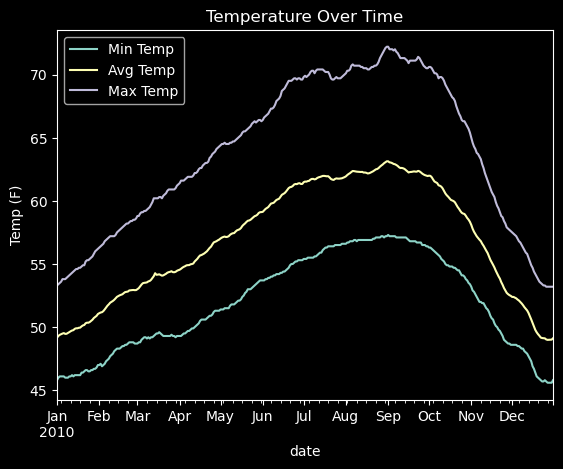

In [64]:
sf.resample('D', on='date').min().temp.plot(label='Min Temp')
sf.resample('D', on='date').mean().temp.plot(label='Avg Temp')
sf.resample('D', on='date').max().temp.plot(label='Max Temp')
plt.legend()
plt.ylabel('Temp (F)')
plt.title('Temperature Over Time')
plt.show()

### seattle_weather()

#### Prep

In [81]:
sw = data.seattle_weather()

In [82]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [83]:
sw = sw.set_index('date')

In [84]:
sw = sw.sort_index()

In [85]:
sw

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


#### 1. 
Which year and month combination has the highest amount of precipitation?


In [87]:
sw.resample('M').sum().sort_values('precipitation', ascending=False).head(1)

# DECEMBER 2015

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-31,284.5,259.8,118.6,134.6,fogfogfogfogfogfogfogfogfogfogsunfogsunsunfogf...


#### 2. 
Visualize the amount of monthly precipitation over time.


<Axes: xlabel='date'>

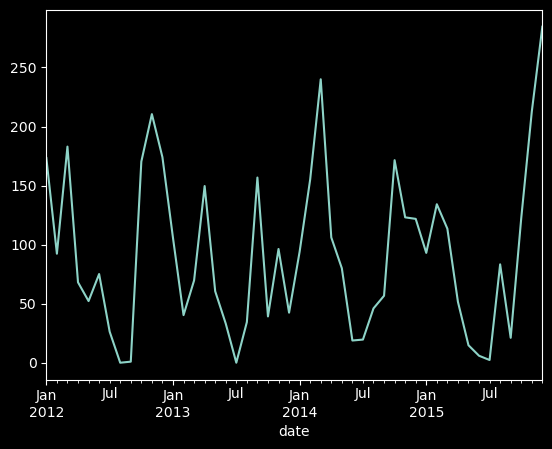

In [94]:
# Visualize only precipitation

sw.resample('M').precipitation.sum().plot()

#### 3. 
Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<Axes: xlabel='date'>

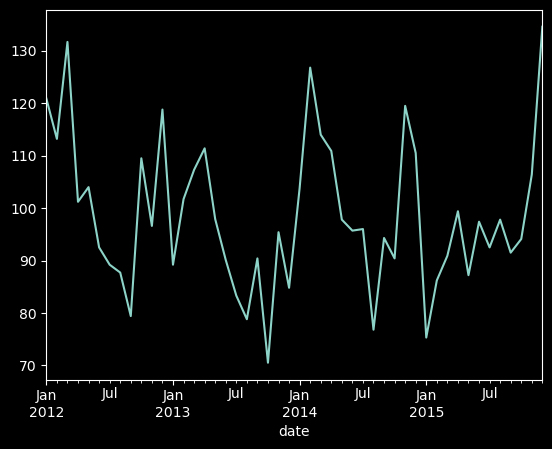

In [98]:
sw.resample('M')['wind'].sum().plot()

#### 4. 
Which year-month combination is the windiest?


In [104]:
sw.resample('M')['wind'].sum().sort_values(ascending=False)

# DECEMBER 2015

date
2015-12-31    134.6
2012-03-31    131.7
2014-02-28    126.8
2012-01-31    120.9
2014-11-30    119.5
2012-12-31    118.8
2014-03-31    114.0
2012-02-29    113.2
2013-04-30    111.4
2014-04-30    110.9
2014-12-31    110.5
2012-10-31    109.5
2013-03-31    107.3
2015-11-30    106.4
2012-05-31    104.0
2014-01-31    103.8
2013-02-28    101.7
2012-04-30    101.2
2015-04-30     99.4
2013-05-31     97.9
2015-08-31     97.8
2014-05-31     97.8
2015-06-30     97.4
2012-11-30     96.6
2014-07-31     96.0
2014-06-30     95.7
2013-11-30     95.4
2014-09-30     94.3
2015-10-31     94.1
2015-07-31     92.5
2012-06-30     92.5
2015-09-30     91.5
2015-03-31     90.9
2013-09-30     90.4
2014-10-31     90.4
2013-06-30     90.1
2013-01-31     89.2
2012-07-31     89.2
2012-08-31     87.7
2015-05-31     87.2
2015-02-28     86.2
2013-12-31     84.8
2013-07-31     83.3
2012-09-30     79.4
2013-08-31     78.8
2014-08-31     76.8
2015-01-31     75.3
2013-10-31     70.5
Name: wind, dtype: float64

#### 5. 
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [109]:
sw.resample('Y').weather.value_counts()

# 2014 had the most days with sun

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: count, dtype: int64

#### 6. 
In which month does it rain the most?


In [142]:
sw['precipitation'].groupby([sw.index.month]).mean().sort_values(ascending=False)

# November on average gets the most rain

date
11    5.354167
12    5.021774
3     4.888710
10    4.059677
1     3.758065
2     3.734513
4     3.128333
9     1.962500
5     1.673387
8     1.320161
6     1.107500
7     0.388710
Name: precipitation, dtype: float64

#### 7. 
Which month has the most number of days with a non-zero amount of precipitation?

In [121]:
sw[sw['precipitation'] > 0].resample('M').precipitation.count()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: precipitation, dtype: int64

### flights_20k

In [144]:
fl = data.flights_20k()

In [145]:
fl

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [149]:
fl = fl.set_index('date')

In [167]:
fl

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


#### 1. 
Convert any negative delays to 0.


In [146]:
# If delay < 0, change to 0

fl['delay'] = fl.delay.apply(lambda x: 0 if x < 0 else x)

#### 2. 
Which hour of the day has the highest average delay?


In [163]:
fl['delay'].groupby([fl.index.hour]).mean().sort_values(ascending=False).head(1)

# On average, 3 AM has the highest delay

date
3    302.5
Name: delay, dtype: float64

#### 3.
Does the day of the week make a difference in the delay amount?


In [164]:
fl['delay'].groupby([fl.index.strftime('%A')]).mean().head(1)

# On average, Friday delays more

date
Friday    17.757596
Name: delay, dtype: float64

#### 4. 
Does the month make a difference in the delay amount?

In [166]:
fl.resample('M')['delay'].mean()

# February has the highest average delay amount, but it is the only month with complete data

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

### Bonus iowa_electricity()

In [266]:
ia = data.iowa_electricity()

In [267]:
ia

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


In [268]:
fossil = ia.iloc[0:17]
fossil.rename(columns={'net_generation':'fossil_generation'}, inplace=True)

nuclear = ia.iloc[17:34]
nuclear.rename(columns={'net_generation':'nuclear_generation'}, inplace=True)

renewable = ia.iloc[34:51]
renewable.rename(columns={'net_generation':'renewable_generation'}, inplace=True)

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_58315/1265150571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil.rename(columns={'net_generation':'fossil_generation'}, inplace=True)
/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_58315/1265150571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear.rename(columns={'net_generation':'nuclear_generation'}, inplace=True)
/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_58315/1265150571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [269]:
# Merge the 3 dataframes on 'year'

ia2 = fossil.merge(nuclear, on='year').merge(renewable, on='year')

In [270]:
ia2['total'] = ia2['fossil_generation'] + ia2['nuclear_generation'] + ia2['renewable_generation']

In [271]:
ia2

,year,source_x,fossil_generation,source_y,nuclear_generation,source,renewable_generation,total
0,2001-01-01,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437,40651
1,2002-01-01,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963,42528
2,2003-01-01,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885,42107
3,2004-01-01,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102,43236
4,2005-01-01,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724,44145
5,2006-01-01,Fossil Fuels,37014,Nuclear Energy,5095,Renewables,3364,45473
6,2007-01-01,Fossil Fuels,41389,Nuclear Energy,4519,Renewables,3870,49778
7,2008-01-01,Fossil Fuels,42734,Nuclear Energy,5282,Renewables,5070,53086
8,2009-01-01,Fossil Fuels,38620,Nuclear Energy,4679,Renewables,8560,51859
9,2010-01-01,Fossil Fuels,42750,Nuclear Energy,4451,Renewables,10308,57509


In [272]:
ia2 = ia2.set_index('year')

ia2.index = ia2.index.strftime('%Y')

#### 1. 
For each row, calculate the percentage of the year's total that energy source provided.


In [273]:
ia2['fossil_prop'] = round(ia2['fossil_generation'] / ia2['total'], 2)

In [274]:
ia2['nuclear_prop'] = round(ia2['nuclear_generation'] / ia2['total'], 2)

In [275]:
ia2['renewable_prop'] = round(ia2['renewable_generation'] / ia2['total'], 2)

In [276]:
ia2

,source_x,fossil_generation,source_y,nuclear_generation,source,renewable_generation,total,fossil_prop,nuclear_prop,renewable_prop
year,,,,,,,,,,
2001,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437,40651,0.87,0.09,0.04
2002,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963,42528,0.85,0.11,0.05
2003,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885,42107,0.86,0.09,0.04
2004,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102,43236,0.84,0.11,0.05
2005,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724,44145,0.84,0.10,0.06
2006,Fossil Fuels,37014,Nuclear Energy,5095,Renewables,3364,45473,0.81,0.11,0.07
2007,Fossil Fuels,41389,Nuclear Energy,4519,Renewables,3870,49778,0.83,0.09,0.08
2008,Fossil Fuels,42734,Nuclear Energy,5282,Renewables,5070,53086,0.80,0.10,0.10
2009,Fossil Fuels,38620,Nuclear Energy,4679,Renewables,8560,51859,0.74,0.09,0.17


#### 2.
Lineplot of generation over time, color by source


In [277]:
# Lineplot the three sources

#### 3. 
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


In [278]:
ia = ia.set_index('year')

ia.index = ia.index.strftime('%Y')

ia.pivot_table(index='source', columns='year')

net_generation                                            \
year                     2001   2002   2003   2004   2005   2006   2007   
source                                                                    
Fossil Fuels            35361  35991  36234  36205  36883  37014  41389   
Nuclear Energy           3853   4574   3988   4929   4538   5095   4519   
Renewables               1437   1963   1885   2102   2724   3364   3870   

                                                                               \
year             2008   2009   2010   2011   2012   2013   2014   2015   2016   
source                                                                          
Fossil Fuels    42734  38620  42750  39361  37379  34873  35250  32319  28437   
Nuclear Energy   5282   4679   4451   5215   4347   5321   4152   5243   4703   
Renewables       5070   8560  10308  11795  14949  16476  17452  19091  21241   

                       
year             2017  
source                 
Fossil Fuels    29329  
Nuclear Energy   5214  
Renewables      21933

#### 4. 
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line

<Axes: xlabel='year'>

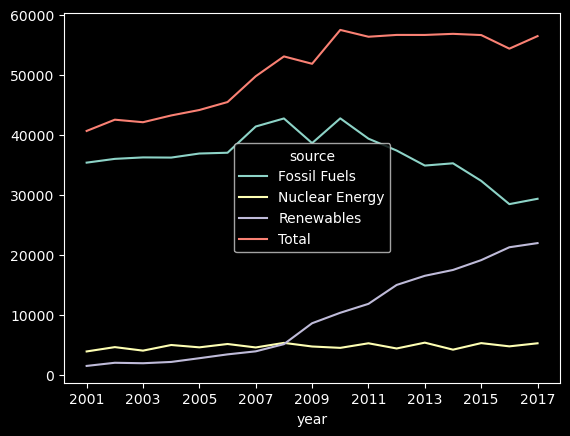

In [279]:
# Make a line plot that shows the amount of energy generated over time. Each source should be a separate line

ia.pivot_table(index='year', columns='source', values='net_generation').plot()

# Add a line for the sum of all 3

ia.pivot_table(index='year', columns='source', values='net_generation').sum(axis=1).plot(legend=True, label='Total')

#### 5. 
Is the total generation increasing over time?


<Axes: xlabel='year'>

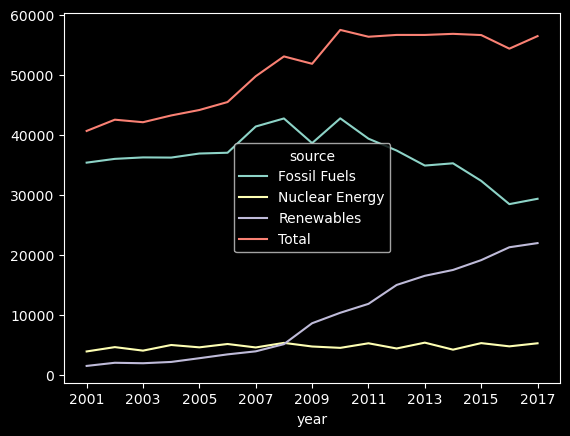

In [280]:
# Make a line plot that shows the amount of energy generated over time. Each source should be a separate line

ia.pivot_table(index='year', columns='source', values='net_generation').plot()

# Add a line for the sum of all 3

ia.pivot_table(index='year', columns='source', values='net_generation').sum(axis=1).plot(legend=True, label='Total')

#### 5a. 
How would you control for increasing consumption over time when considering how much energy is coming from each source?


#### 5b. 
Express each number as a % of the year's total

In [285]:
# Express each number as a % of the year's total

ia2.iloc[:,6:11]

,total,fossil_prop,nuclear_prop,renewable_prop
year,,,,
2001,40651,0.87,0.09,0.04
2002,42528,0.85,0.11,0.05
2003,42107,0.86,0.09,0.04
2004,43236,0.84,0.11,0.05
2005,44145,0.84,0.10,0.06
2006,45473,0.81,0.11,0.07
2007,49778,0.83,0.09,0.08
2008,53086,0.80,0.10,0.10
2009,51859,0.74,0.09,0.17


### Bonus: sf_temps

#### 2. 
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

#### 3. 
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


#### 4. 
Create pretty labels for time plots


#### 5. 
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

### Bonus: explore birdstrikes

In [ ]:
df = data.birdstrikes()

## Notes

1. Make the `date` column datetime object

2. Move it to the index

3. Sort the date time index